In [1]:
# runtime
import timeit

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# preprocessing
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

# Ml model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

np.warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')

# print(df.head())
# print(df.shape)
# print(df.isnull().values.any())

X = df.iloc[:,1:].values
y = df.iloc[:,0].values.reshape(-1, 1)

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

[[0.37059426 0.42438945 0.40574977 ... 0.56405011 1.         0.01646874]
 [0.46429094 0.53821413 0.51673002 ... 0.57017495 1.         0.02079431]
 [0.42607127 0.49901875 0.47229509 ... 0.56370608 1.         0.01647411]
 ...
 [0.47272461 0.533744   0.52063815 ... 0.5651584  1.         0.09764874]
 [0.50626432 0.5599106  0.55404465 ... 0.56530151 1.         0.04400945]
 [0.49305319 0.57010467 0.54954762 ... 0.56516694 1.         0.23390224]]
[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [3]:
n_features = [5, 10, 15, 20, 25, 30, 35, 40]
for i in n_features:
    # Building the model based feature selection
    select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=i)

    select.fit(X_train, y_train)

    mask = select.get_support()

    X_train_rfe = select.transform(X_train)
    X_test_rfe = select.transform(X_test)

    score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
    
    print("Test score: {:.3f}".format(score), " number of features: {}".format(i))

Test score: 0.965  number of features: 5
Test score: 0.967  number of features: 10
Test score: 0.971  number of features: 15
Test score: 0.970  number of features: 20
Test score: 0.973  number of features: 25
Test score: 0.972  number of features: 30
Test score: 0.971  number of features: 35
Test score: 0.973  number of features: 40


In [4]:
# Selecting 15 Features

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=15)

select.fit(X_train, y_train)

mask = select.get_support()

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

print("Test score: {:.3f}".format(score), " number of features: {}".format(15))

features = pd.DataFrame({'features':list(df.iloc[:,1:].keys()), 'select':list(mask)})
features = list(features[features['select']==True]['features'])
features.append('Bankrupt?')

Test score: 0.972  number of features: 15


In [5]:
df = df[features]
print(df)

       Non-industry income and expenditure/revenue  \
0                                         0.302646   
1                                         0.303556   
2                                         0.302035   
3                                         0.303350   
4                                         0.303475   
...                                            ...   
6814                                      0.303510   
6815                                      0.303520   
6816                                      0.303512   
6817                                      0.303498   
6818                                      0.313415   

       Interest-bearing debt interest rate   Net Value Per Share (A)  \
0                             7.250725e-04                  0.147950   
1                             6.470647e-04                  0.182251   
2                             7.900790e-04                  0.177911   
3                             4.490449e-04                  0.1

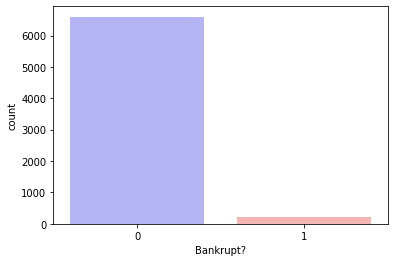

Bankrupt?
0    6599
1     220
dtype: int64

In [6]:
sns.countplot(data=df, x='Bankrupt?', palette='bwr')
plt.show()

df.groupby('Bankrupt?').size()

In [7]:
from imblearn.over_sampling import SMOTE

X = df.drop(labels=['Bankrupt?'], axis=1)
y = df['Bankrupt?']

        Non-industry income and expenditure/revenue  \
0                                          0.302646   
1                                          0.303556   
2                                          0.302035   
3                                          0.303350   
4                                          0.303475   
...                                             ...   
13193                                      0.303323   
13194                                      0.303433   
13195                                      0.300781   
13196                                      0.303243   
13197                                      0.303414   

        Interest-bearing debt interest rate   Net Value Per Share (A)  \
0                                  0.000725                  0.147950   
1                                  0.000647                  0.182251   
2                                  0.000790                  0.177911   
3                                  0.000449    

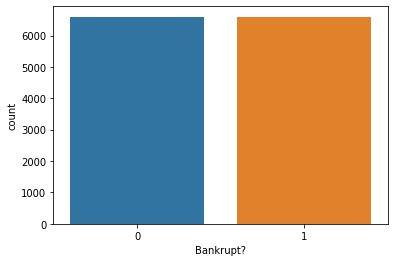

In [8]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

sns.countplot(x=y)

print(X)
print(y)

In [9]:
# df.columns = df.columns.to_series().apply(lambda x: x.strip())

# X = df[['Net profit before tax/Paid-in capital', 'Persistent EPS in the Last Four Seasons', 'Interest-bearing debt interest rate', 'Total debt/Total net worth', 'Fixed Assets Turnover Frequency', 'Cash/Total Assets', 'Equity to Liability', 'Degree of Financial Leverage (DFL)', 'Net Income to Total Assets', 'Net Income to Stockholder\'s Equity', 'Borrowing dependency', 'Interest Expense Ratio', 'Net Value Growth Rate', 'Net Value Per Share (A)', 'Non-industry income and expenditure/revenue']]
# y = df[['Bankrupt?']]

# print(X)
# print(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(y_test)

5665     0
9124     1
5163     0
12654    1
9515     1
        ..
554      0
944      0
6021     0
8099     1
10744    1
Name: Bankrupt?, Length: 1320, dtype: int64


In [11]:
df.drop_duplicates(inplace=True)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 150, random_state = 42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(predictions.shape)

(1320,)


In [12]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# predictions = predictions.reshape(1, 2)
# confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
# sns.heatmap(confusion_matrix, annot=True)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions, labels=(1, 0))
print("Confusion Matrix:", cm)

Confusion Matrix: [[630   3]
 [ 28 659]]


In [13]:
from sklearn import metrics

print('Accuracy: ', metrics.accuracy_score(y_test, predictions))
# plt.show()

Accuracy:  0.9765151515151516


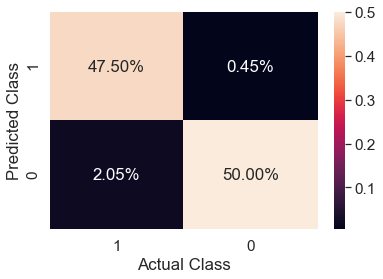

In [16]:
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(cm/np.sum(cm), fmt='.2%', xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True)
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       687
           1       0.96      1.00      0.98       633

    accuracy                           0.98      1320
   macro avg       0.98      0.98      0.98      1320
weighted avg       0.98      0.98      0.98      1320

